In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


In [9]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [10]:
len(ds_train)

60000

In [11]:
len(ds_test)

10000

In [18]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

2024-06-11 10:47:33.680397: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


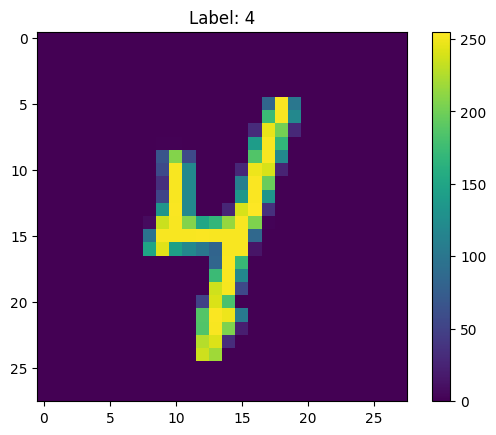

2024-06-11 10:47:33.782424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
def show_first_image(ds):
    for image, label in ds.take(1):
        plt.imshow(image.numpy().squeeze())
        plt.colorbar()
        plt.title(f"Label: {label.numpy()}")
        plt.show()

# Afficher la première image du dataset d'entraînement
show_first_image(ds_train)

In [69]:
def get_normalized_images_as_array(ds):
    images = []
    labels = []
    for image, label in tfds.as_numpy(ds):
        # Normaliser les pixels entre 0 et 1
        normalized_image = image / 255.0
        images.append(normalized_image)
        labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Fonction pour afficher une image normalisée
def show_normalized_image(images, labels, index):
    plt.imshow(images[index].squeeze())
    plt.colorbar()
    plt.title(f"Label: {labels[index]}")
    plt.show()

In [74]:
# Récupérer et normaliser les images et les étiquettes du dataset d'entraînement
train_images, train_labels = get_normalized_images_as_array(ds_train)
test_images, test_labels = get_normalized_images_as_array(ds_train)

2024-06-11 11:41:08.492357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-11 11:41:14.771846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


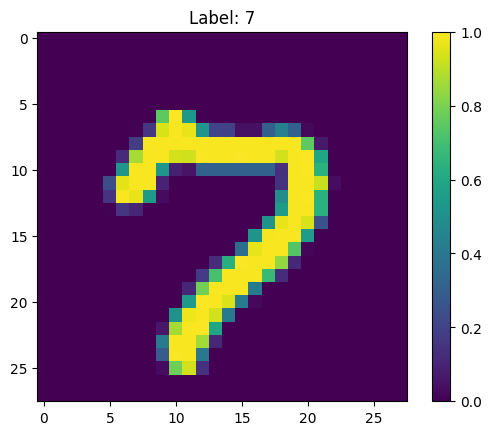

In [75]:
show_normalized_image(train_images, train_labels, 3)

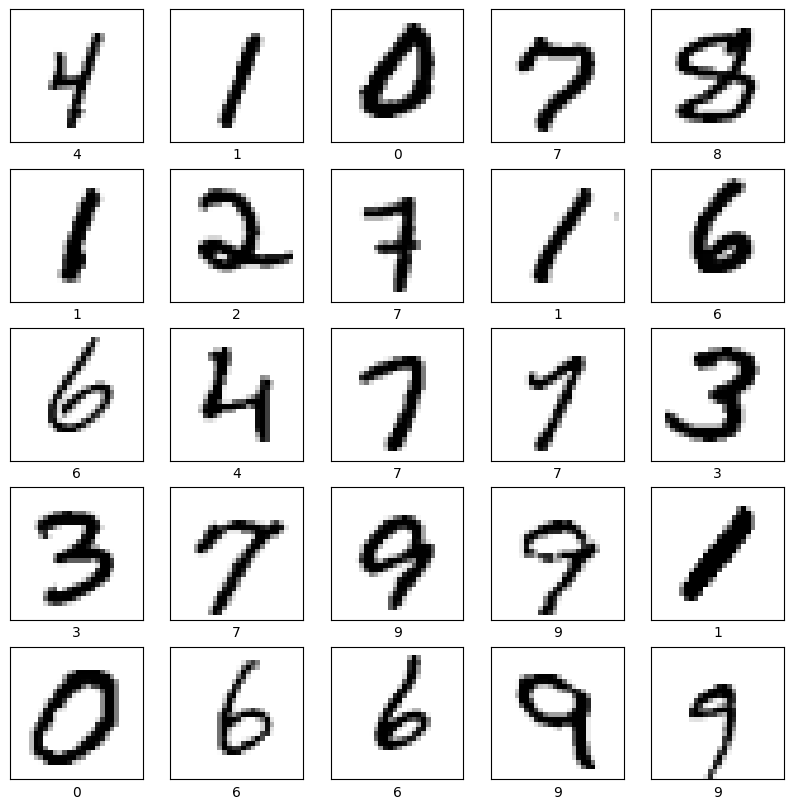

In [76]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/home/matgo/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9986 - val_loss: 0.0045
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9976 - val_loss: 0.0071
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9991 - loss: 0.0024 - val_accuracy: 0.9988 - val_loss: 0.0035
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9987 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9980 - val_loss: 0.0062
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9979 - loss: 0.0066 

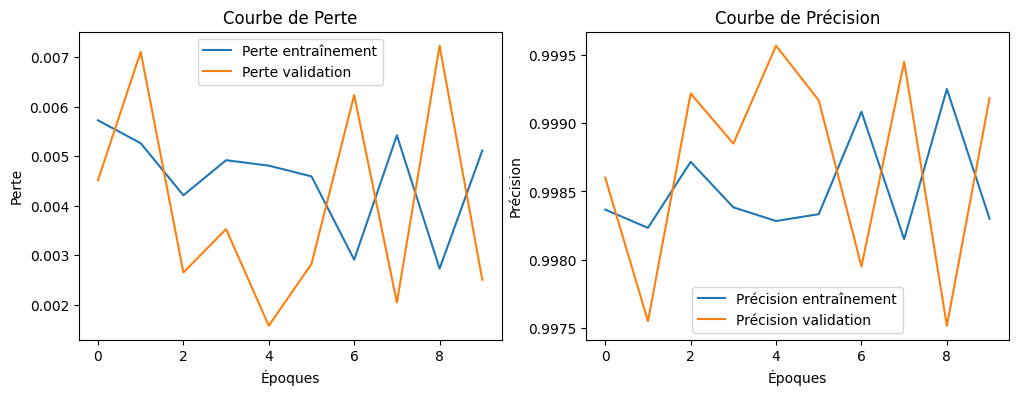

In [99]:
plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de Perte')

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [80]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

1875/1875 - 2s - 1ms/step - accuracy: 0.9966 - loss: 0.0119

Test accuracy: 0.9966333508491516


In [81]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [82]:
predictions = probability_model.predict(test_images)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [83]:
predictions[0]

array([1.5080183e-09, 2.4127721e-06, 9.0463464e-10, 1.4192905e-07,
       9.9847156e-01, 1.1500351e-04, 7.9733322e-09, 1.9128838e-06,
       1.3362049e-05, 1.3956194e-03], dtype=float32)

In [84]:
np.argmax(predictions[0])

4

In [85]:
test_labels[0]

4

In [86]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

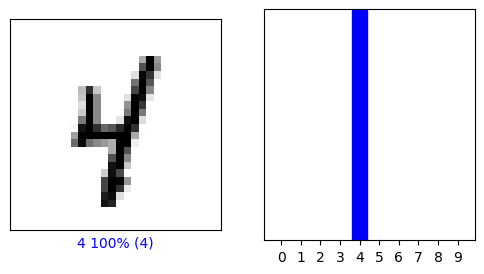

In [87]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

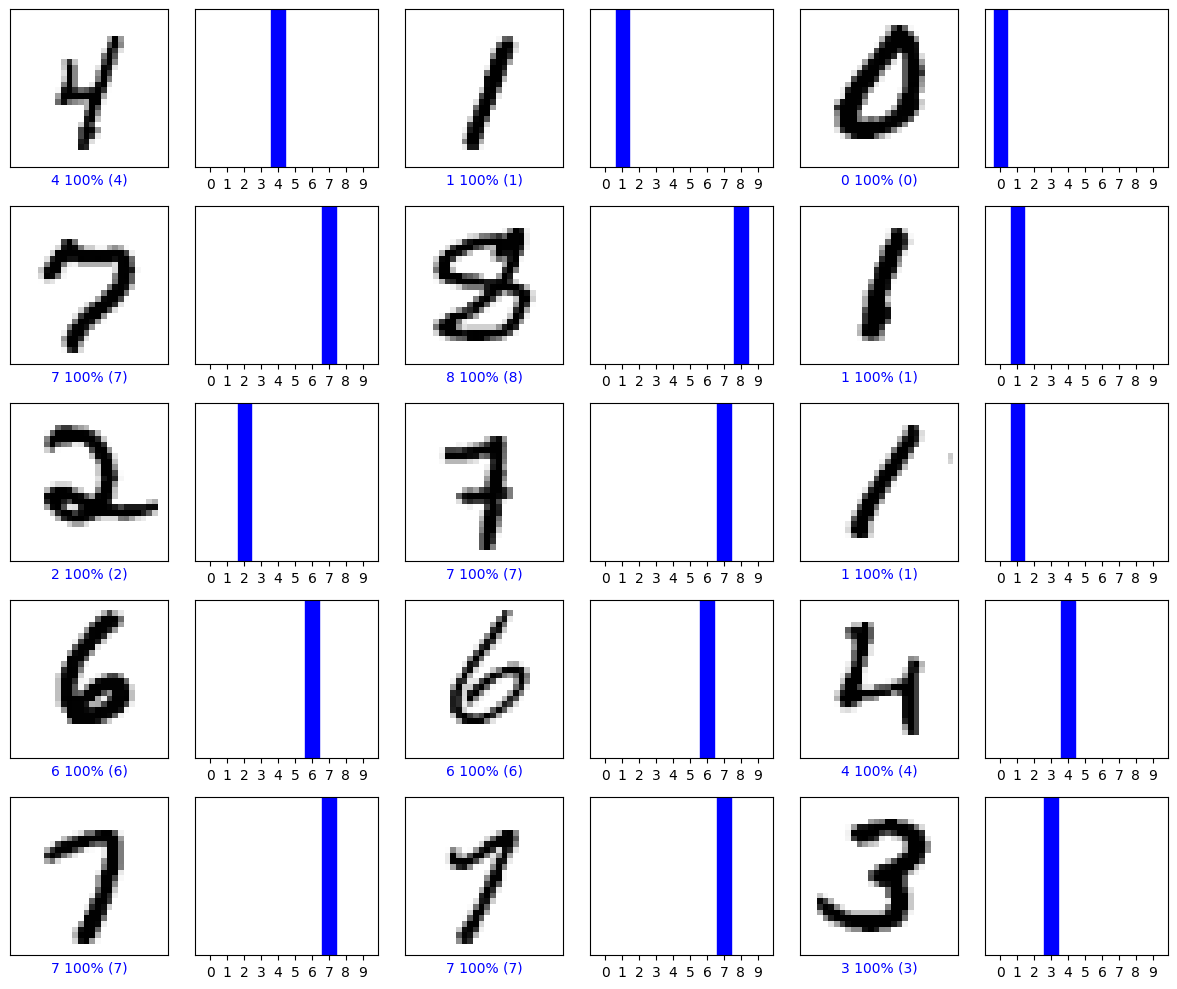

In [88]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()